 # Workshop 4 b - small numerical model

The well-known toy model for atmospheric variablity is the Lorenz 1963 model given by
the following set of ordinary differential equations:

$$ \frac{dx}{dt} = s(y-x) $$

$$ \frac{dy}{dt} = rx - y - xz $$

$$ \frac{dz}{dt} = xy-bz $$

This system is, for standard values of parameters $s = 10, r = 28$ and $b = 2.667$, a chaotic system with sensitivity to initial conditions. Use for this exercise $\Delta t = 0.02$ and $t_{end} = 100$.

Goal: Investigate the behaviour of the Lorenz model in the following sub-exercises,
by generating contourf plots and 3D plots.

1. Write a definition to return $\frac{dx}{dt}, \frac{dy}{dt}, \frac{dz}{dt}$ and use this to update $x, y$ and $z$ with a simple Euler forward scheme.

2. Determine the values for $x, y, z$ while using the initial conditions of $x_0 = 0,
y_0 = 1$ and $z_0 = 1.05$. Plot the time series of $x, y, z$.

3. Now set $x_0 = 0.1$ and plot the the time series for $x_0 = 0$ and $x_0 = 0.1$. Explain
the results qualitatively.

4. Vary $x_0$ in the range of 0 to 0.2 and make a contourf plot for the value of $z$.
Try to make a similar plot as in the figure (a) below.

5. Make a 3D plot of $x, y, z$ (see the figure (b) below, $x_0 = 0$). Use the `Axes3D`
module in python (look up how to implement this).

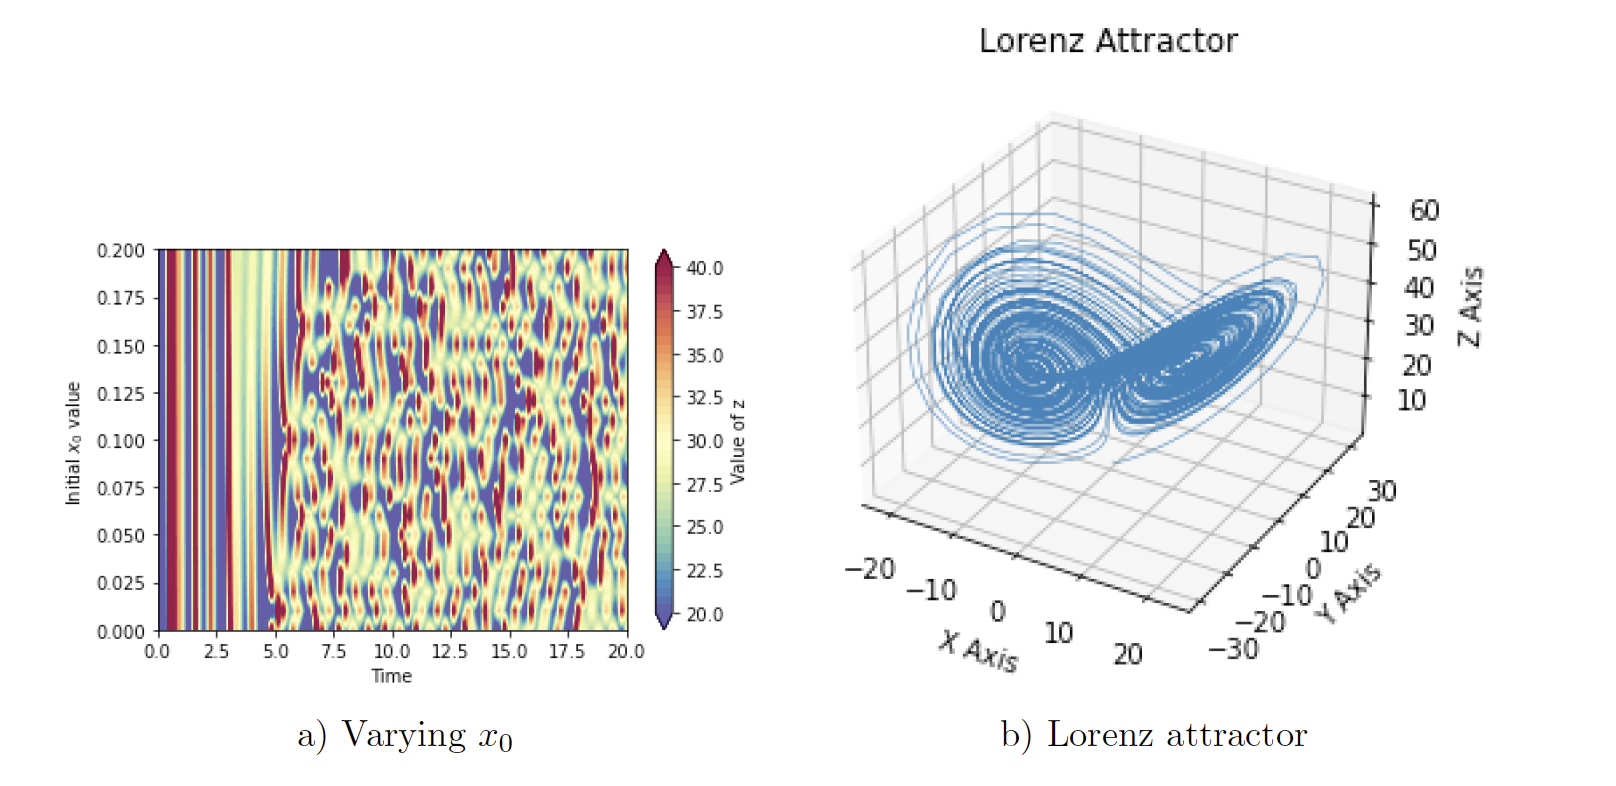

# Solutions 

In [ ]:
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D


def Lorenz(x, y, z, s = 10, r = 28, b = 2.667):
    """Lorenz attractor, given x, y, z,
    s, r and b are given values.
    Returns x_dot, y_dot and z_dot"""
    
    x_dot = s * (y - x)
    y_dot = r * x - y - x * z
    z_dot = x * y - b * z
    
    return x_dot, y_dot, z_dot



In [ ]:
#Specifing time step and length
time_end = 100.0
delta_t  = 0.02

#Initial values
x_0, y_0, z_0 = 0.0, 1.0, 1.05

#Empty arrays for the coordinates
time    = np.arange(0, time_end + delta_t, delta_t)
x_all   = np.zeros(len(time))
y_all   = np.zeros(len(time))
z_all   = np.zeros(len(time))

#Start with the initial conditions
x_all[0] = x_0
y_all[0] = y_0
z_all[0] = z_0


In [ ]:
#Time loop
for time_i in range(len(time) - 1):
    x_dot, y_dot, z_dot = Lorenz(x_all[time_i], y_all[time_i], z_all[time_i])
    x_all[time_i + 1]   = x_all[time_i] + (x_dot * delta_t)
    y_all[time_i + 1]   = y_all[time_i] + (y_dot * delta_t)
    z_all[time_i + 1]   = z_all[time_i] + (z_dot * delta_t)

# Plot
fig = figure()
ax = fig.gca(projection='3d')

ax.plot(x_all, y_all, z_all, linewidth = 0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

show()



In [ ]:
time_end= 20.0
time    = np.arange(0, time_end + delta_t, delta_t)
x_all   = np.zeros((len(time), 21))
y_all   = np.zeros((len(time), 21))
z_all   = np.zeros((len(time), 21))

#Start with the initial conditions
x_all[0] = np.arange(0, 0.201, 0.01)
y_all[0] = y_0
z_all[0] = z_0


In [ ]:
#Time loop
for time_i in range(len(time) - 1):
    for x_i in range(len(x_all[0])):
        x_dot, y_dot, z_dot = Lorenz(x_all[time_i, x_i], y_all[time_i, x_i], z_all[time_i, x_i])
        x_all[time_i + 1, x_i]   = x_all[time_i, x_i] + (x_dot * delta_t)
        y_all[time_i + 1, x_i]   = y_all[time_i, x_i] + (y_dot * delta_t)
        z_all[time_i + 1, x_i]   = z_all[time_i, x_i] + (z_dot * delta_t)
        
 
fig, ax= subplots()

plot(time, x_all[:, 0], '-r')
plot(time, x_all[:, 1], '-k')

fig, ax= subplots()

x, y = np.meshgrid(time, x_all[0])
CS   = ax.contourf(x, y, z_all.transpose(), levels = np.arange(20, 40.1, 0.5), extend = 'both', cmap = 'Spectral_r')
cbar = colorbar(CS)
cbar.set_label('Value of z')
ax.set_xlabel('Time')
ax.set_ylabel('Initial $x_0$ value')

show()
